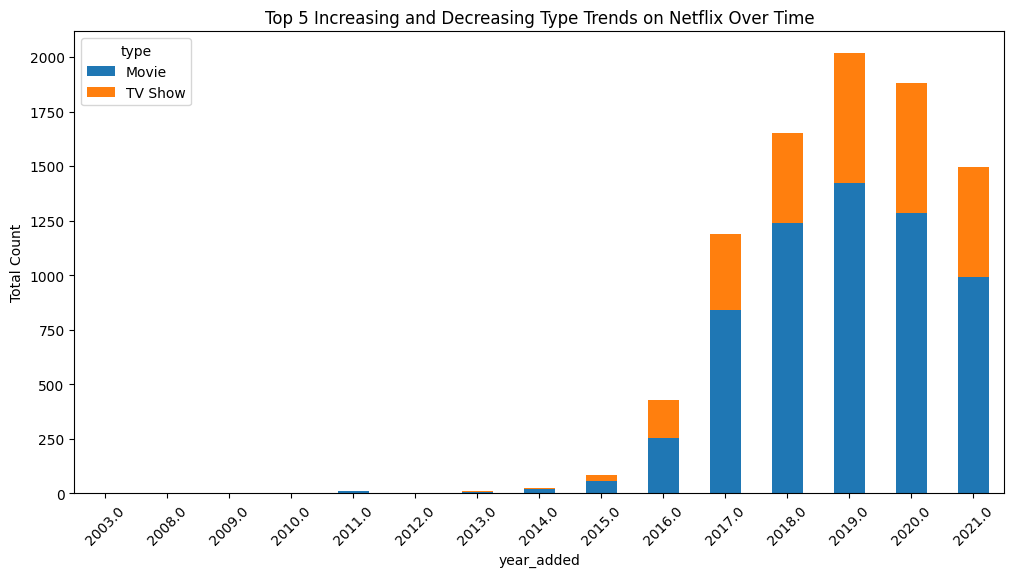

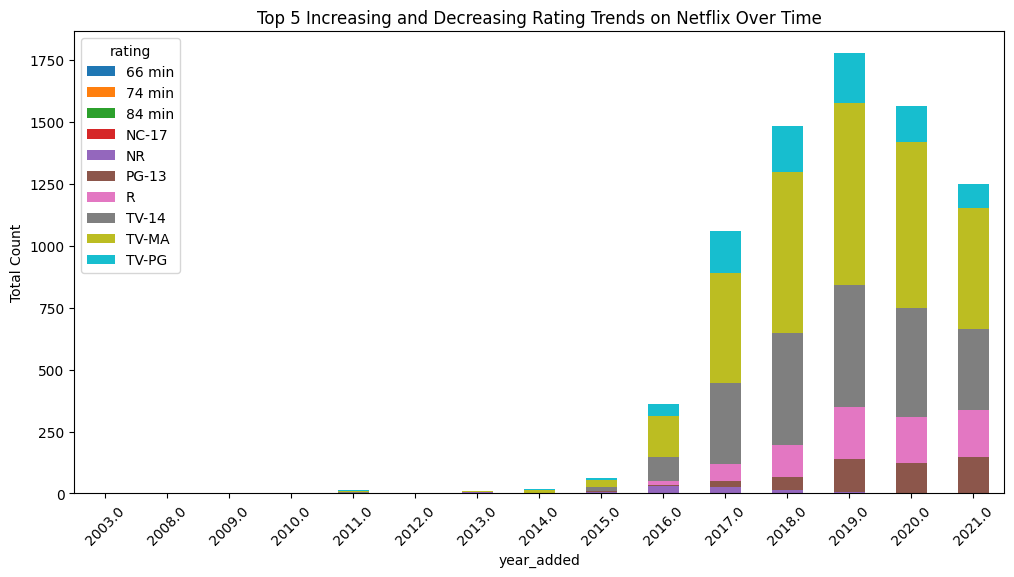

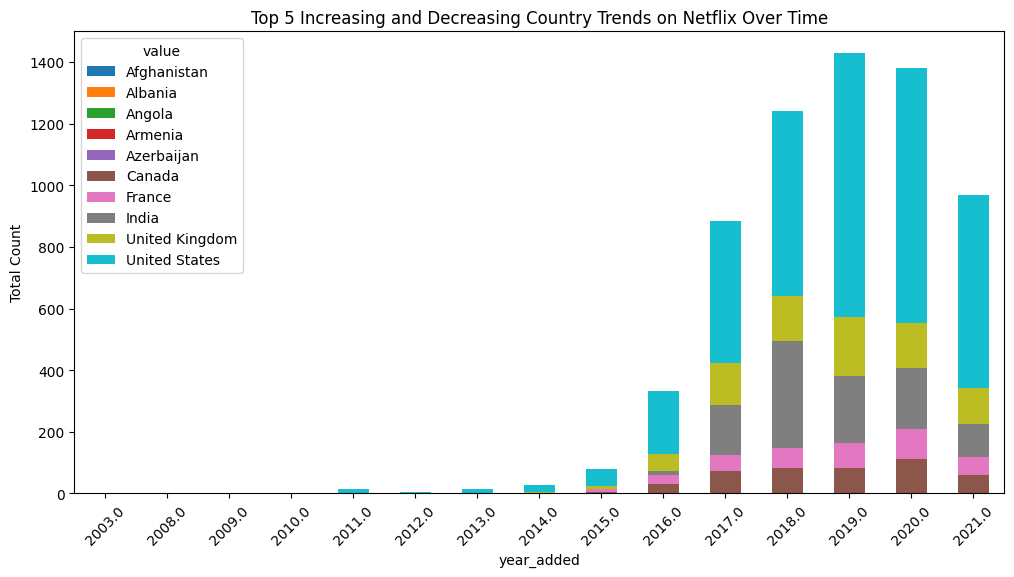

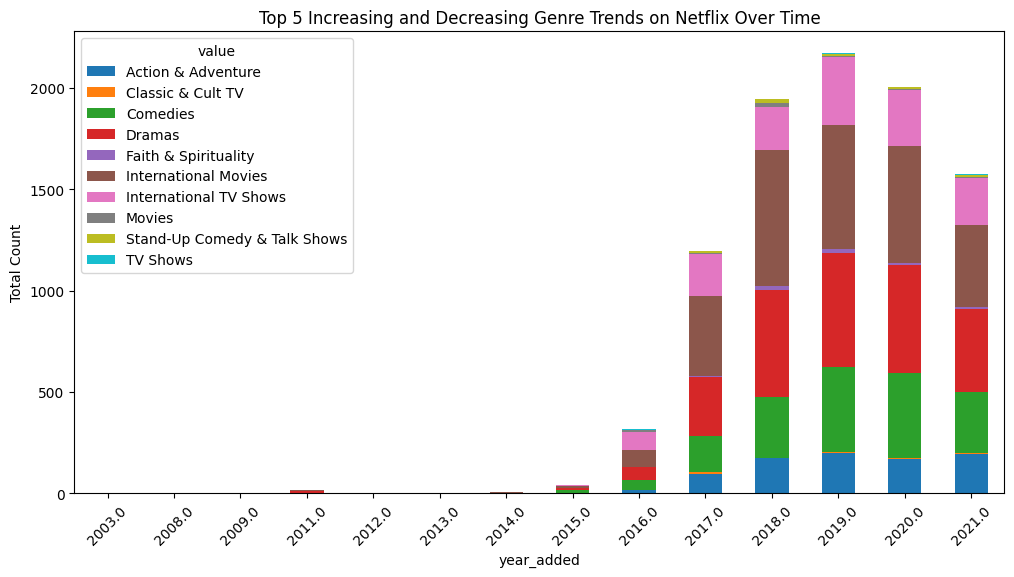

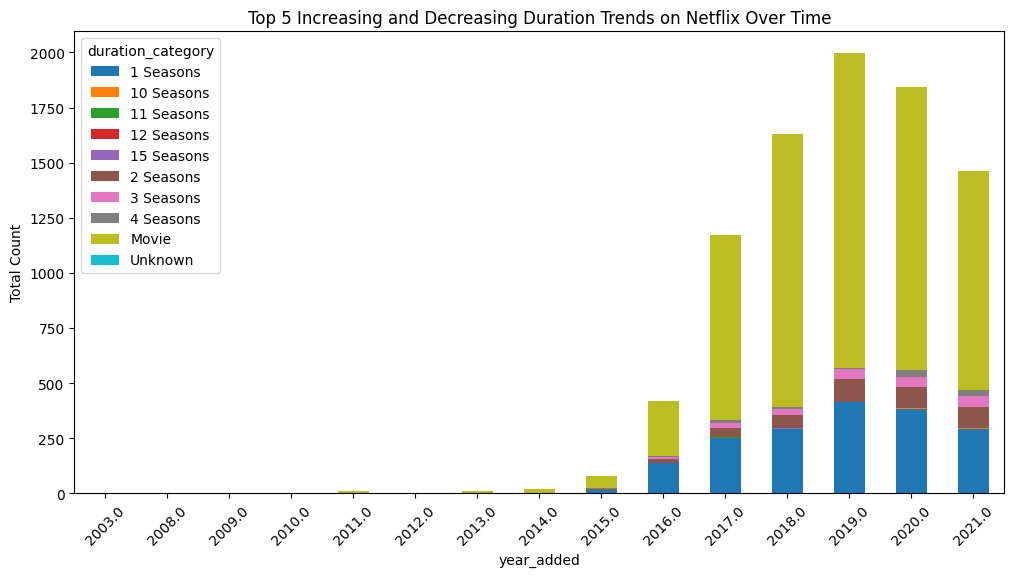

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to prepare data for stacked bar chart with top 5 increasing and decreasing categories
def prepare_top_changes_data(df, group_cols):
    # Group and count data
    grouped = df.groupby(group_cols).size().reset_index(name='counts')
    # Pivot for easy calculations
    pivot_data = grouped.pivot(index=group_cols[0], columns=group_cols[1], values='counts').fillna(0)
    # Calculate the change
    change = pivot_data.iloc[-1] - pivot_data.iloc[0]
    # Get top 5 increasing and decreasing
    top_increasing = change.nlargest(5).index.tolist()
    top_decreasing = change.nsmallest(5).index.tolist()
    # Filter data for these top categories
    filtered_grouped = grouped[grouped[group_cols[1]].isin(top_increasing + top_decreasing)]
    return filtered_grouped

# Function to plot stacked bar chart
def plot_stacked_bar(data, index_col, column_col, title=''):
    pivot_data = data.pivot(index=index_col, columns=column_col, values='counts')
    pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Total Count')
    plt.show()

# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Convert 'date_added' to datetime and extract the year
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# Handling missing data
df['year_added'].fillna(df['release_year'], inplace=True)

# Content Type Trend
data_type = prepare_top_changes_data(df, ['year_added', 'type'])
plot_stacked_bar(data_type, 'year_added', 'type', 'Top 5 Increasing and Decreasing Type Trends on Netflix Over Time')

# Ratings Trend
data_rating = prepare_top_changes_data(df, ['year_added', 'rating'])
plot_stacked_bar(data_rating, 'year_added', 'rating', 'Top 5 Increasing and Decreasing Rating Trends on Netflix Over Time')

# Country-wise Content Trend
country_data = df[df['country'].notna()]
country_data = country_data.assign(value=country_data['country'].str.split(', ')).explode('value')
data_country = prepare_top_changes_data(country_data, ['year_added', 'value'])
plot_stacked_bar(data_country, 'year_added', 'value', 'Top 5 Increasing and Decreasing Country Trends on Netflix Over Time')

# Genre Trend
genre_data = df[df['listed_in'].notna()]
genre_data = genre_data.assign(value=genre_data['listed_in'].str.split(', ')).explode('value')
data_genre = prepare_top_changes_data(genre_data, ['year_added', 'value'])
plot_stacked_bar(data_genre, 'year_added', 'value', 'Top 5 Increasing and Decreasing Genre Trends on Netflix Over Time')

# Handling 'duration' column
df['duration'] = df['duration'].fillna('Unknown')  # Replace NaN with a placeholder string
df['duration_category'] = df.apply(lambda x: x['duration'].split(' ')[0] + ' Seasons' if 'Season' in x['duration'] else ('Movie' if 'min' in x['duration'] else x['duration']), axis=1)
data_duration = prepare_top_changes_data(df, ['year_added', 'duration_category'])

# Plot for 'duration'
plot_stacked_bar(data_duration, 'year_added', 'duration_category', 'Top 5 Increasing and Decreasing Duration Trends on Netflix Over Time')

